In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
%matplotlib inline

In [2]:
data = pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [84]:
data['Month'] = pd.to_datetime(data['Month'],infer_datetime_format=True)
indexedData = data.set_index(['Month'])

In [8]:
from datetime import datetime
indexedData.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
indexedData.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


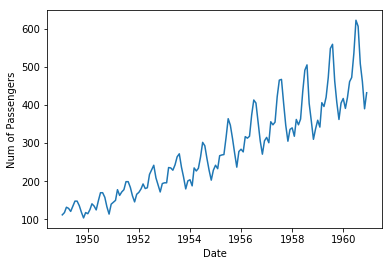

In [11]:
#plotting
plt.xlabel("Date")
plt.ylabel("Num of Passengers")
plt.plot(indexedData)
plt.show()

In [12]:
#Determining the rolling statistics
rollmean = indexedData.rolling(window=12).mean()
rollstd = indexedData.rolling(window=12).std()
print(rollmean,rollstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

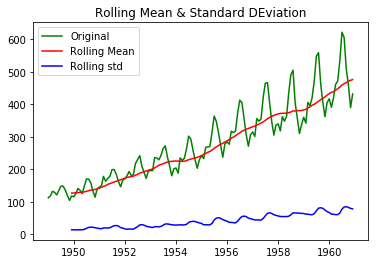

In [21]:
original = plt.plot(indexedData,color='green',label='Original')
mean = plt.plot(rollmean,color='red',label="Rolling Mean")
std = plt.plot(rollstd,color='blue',label='Rolling std')
plt.legend(loc='upper left')
plt.title("Rolling Mean & Standard DEviation")
plt.show()

In [30]:
#perform Dickey-fuller Test
from statsmodels.tsa.stattools import adfuller
datatest = adfuller(indexedData['#Passengers'],autolag='AIC')
dataoutput = pd.Series(datatest[0:4],index=['Test statistic','p-value','#Lags Used','Number of Observations Used'])
print(dataoutput)
for key,value in datatest[4].items():
    dataoutput['Critical Value {}'.format(key)] = value
print(dataoutput)

Test statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64
Test statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value 1%               -3.481682
Critical Value 5%               -2.884042
Critical Value 10%              -2.578770
dtype: float64


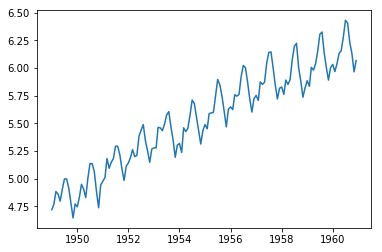

In [32]:
#Estimating the trend
indexedData_logscale = np.log(indexedData)
plt.plot(indexedData_logscale)
plt.show()

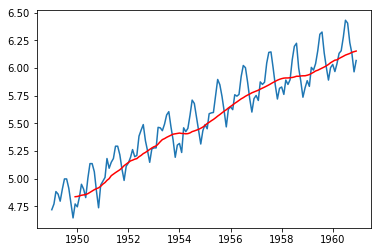

In [34]:
movingAverage = indexedData_logscale.rolling(window=12).mean()
movingstd = indexedData_logscale.rolling(window=12).std
plt.plot(indexedData_logscale)
plt.plot(movingAverage,color='red')
plt.show()

In [36]:
datalogscaleMinusMovingAverage = indexedData_logscale - movingAverage
datalogscaleMinusMovingAverage.head(12)
#Drop Nan
datalogscaleMinusMovingAverage.dropna(inplace=True)
datalogscaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [47]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining the rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingstd = timeseries.rolling(window=12).std()
    
    #plotting rolling statistics
    original = plt.plot(timeseries,color='green',label='Original')
    mean = plt.plot(movingAverage,color='red',label="Rolling Mean")
    std = plt.plot(movingstd,color='blue',label='Rolling std')
    plt.legend(loc='upper left')
    plt.title("Rolling Mean & Standard DEviation")
    plt.show()
    
    #perform Dickey-fuller Test
    datatest = adfuller(timeseries['#Passengers'],autolag='AIC')
    dataoutput = pd.Series(datatest[0:4],index=['Test statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in datatest[4].items():
        dataoutput['Critical Value {}'.format(key)] = value
    print(dataoutput)
    
    
    

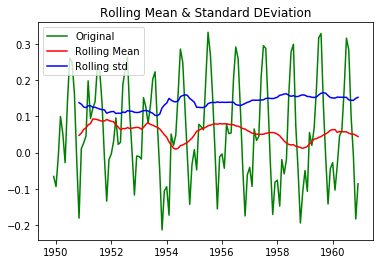

Test statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value 1%               -3.486535
Critical Value 5%               -2.886151
Critical Value 10%              -2.579896
dtype: float64


In [48]:
test_stationarity(datalogscaleMinusMovingAverage)

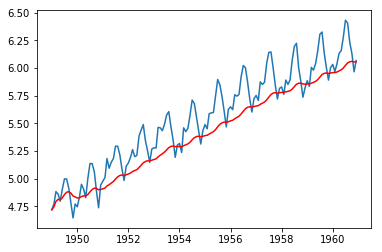

In [50]:
exponentDecayWeightedAverage = indexedData_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedData_logscale)
plt.plot(exponentDecayWeightedAverage,color='red')
plt.show()

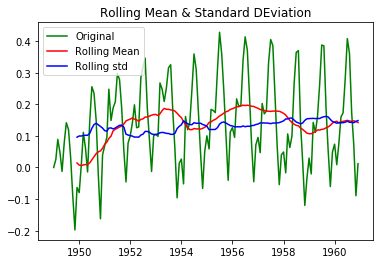

Test statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value 1%               -3.481682
Critical Value 5%               -2.884042
Critical Value 10%              -2.578770
dtype: float64


In [52]:
datalogscaleMinusMovingExponentialDecayAverage = indexedData_logscale - exponentDecayWeightedAverage
test_stationarity(datalogscaleMinusMovingExponentialDecayAverage)

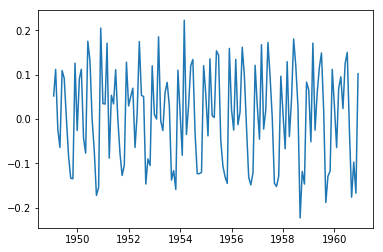

In [54]:
datalogDiffShifting = indexedData_logscale - indexedData_logscale.shift()
plt.plot(datalogDiffShifting)
plt.show()

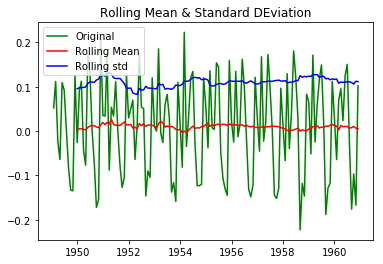

Test statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value 1%               -3.482501
Critical Value 5%               -2.884398
Critical Value 10%              -2.578960
dtype: float64


In [55]:
datalogDiffShifting.dropna(inplace=True)
test_stationarity(datalogDiffShifting)

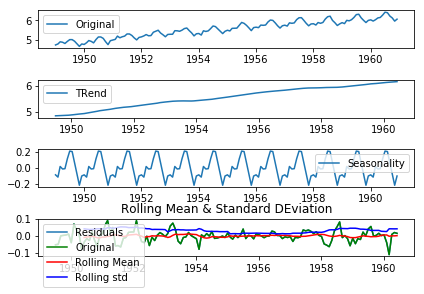

Test statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value 1%             -3.485122e+00
Critical Value 5%             -2.885538e+00
Critical Value 10%            -2.579569e+00
dtype: float64


In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedData_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedData_logscale,label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label="TRend")
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label="Seasonality")
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label="Residuals")
plt.legend(loc='best')

plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

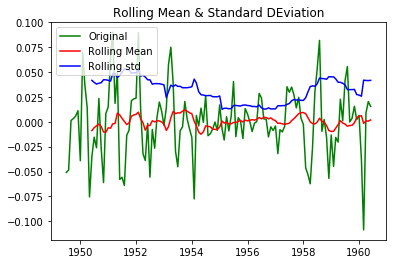

Test statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value 1%             -3.485122e+00
Critical Value 5%             -2.885538e+00
Critical Value 10%            -2.579569e+00
dtype: float64


In [60]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

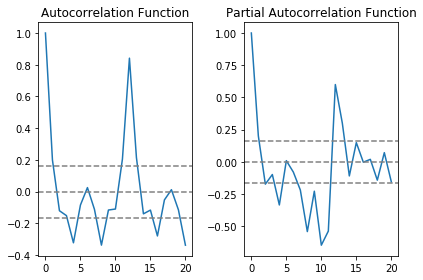

In [62]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datalogDiffShifting,nlags=20)
lag_pacf = pacf(datalogDiffShifting,nlags=20,method='ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datalogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datalogDiffShifting)),linestyle='--',color='gray')
plt.title("Autocorrelation Function")

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datalogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datalogDiffShifting)),linestyle='--',color='gray')
plt.title("Partial Autocorrelation Function")

plt.tight_layout()



C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting AR model


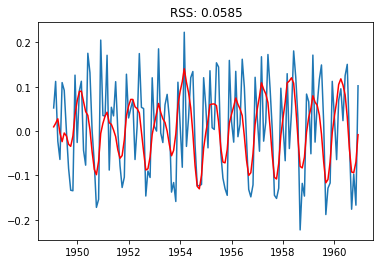

In [69]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
#order (p,I,Q)
model = ARIMA(indexedData_logscale,order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datalogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title("RSS: %.4f"%sum(results_AR.fittedvalues - datalogDiffShifting['#Passengers'])**2)
print("plotting AR model")

C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting AR model


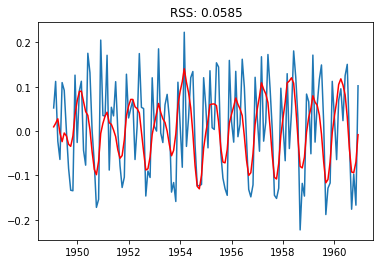

In [67]:
#MA model
#order (p,I,Q)
model = ARIMA(indexedData_logscale,order=(2,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datalogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title("RSS: %.4f"%sum(results_MA.fittedvalues - datalogDiffShifting['#Passengers'])**2)
print("plotting AR model")

C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0585')

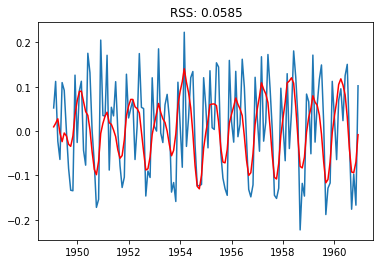

In [70]:
model = ARIMA(indexedData_logscale,order=(2,1,2))
results_arima = model.fit(disp=-1)
plt.plot(datalogDiffShifting)
plt.plot(results_arima.fittedvalues,color='red')
plt.title("RSS: %.4f"%sum(results_arima.fittedvalues - datalogDiffShifting['#Passengers'])**2)


In [72]:
predictions_arima_diff = pd.Series(results_arima.fittedvalues,copy=True)
print(predictions_arima_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [74]:
#convert to cumulative sum
predictions_arima_diff_cumsum = predictions_arima_diff.cumsum()
print(predictions_arima_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [75]:
predictions_arima_log = pd.Series(indexedData_logscale['#Passengers'].ix[0],index=indexedData_logscale.index)
predictions_arima_log = predictions_arima_log.add(predictions_arima_diff_cumsum,fill_value=0)
predictions_arima_log.head()

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

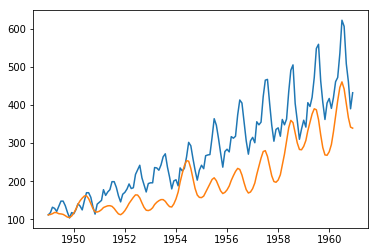

In [76]:
predictions_arima = np.exp(predictions_arima_log)
plt.plot(indexedData)
plt.plot(predictions_arima)

In [77]:
indexedData_logscale.shape

(144, 1)

C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


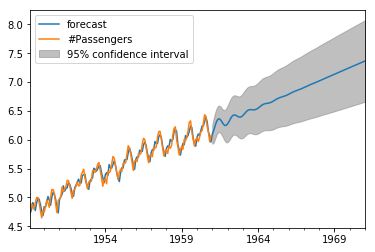

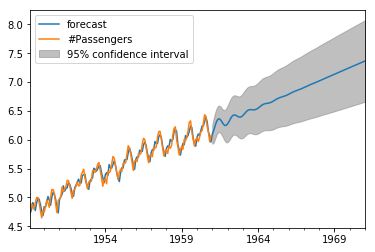

In [78]:
#prediciting the next 10 years
#12 * 10 = 120
#120+144rows=264
results_arima.plot_predict(1,264)

In [79]:
results_arima.forecast(steps=120)

(array([6.09553401, 6.15281416, 6.22442979, 6.2924111 , 6.34164718,
        6.36359355, 6.35784672, 6.33139288, 6.29597526, 6.26447705,
        6.24738324, 6.25025177, 6.27275845, 6.30940321, 6.35151499,
        6.38988655, 6.41727375, 6.43011042, 6.42906674, 6.41842474,
        6.40456143, 6.39403609, 6.39183081, 6.40019505, 6.41833696,
        6.44295411, 6.46937435, 6.49293981, 6.5102411 , 6.51989021,
        6.52267564, 6.52112374, 6.51864516, 6.51853682, 6.52311919,
        6.53322359, 6.54812869, 6.56591556, 6.58410304, 6.60036532,
        6.61313255, 6.62192768, 6.62737775, 6.63093116, 6.63438678,
        6.63937976, 6.64696498, 6.65739836, 6.6701532 , 6.68414245,
        6.69806618, 6.71077891, 6.7215772 , 6.7303397 , 6.73749797,
        6.74386365, 6.75037311, 6.75782582, 6.76668673, 6.77699815,
        6.78841311, 6.80032844, 6.81207184, 6.82308748, 6.83307122,
        6.84202478, 6.85022298, 6.85811207, 6.86617327, 6.87479139,
        6.88416291, 6.89426373, 6.90487878, 6.91